# Data analysis of the models results

This notebook aims to provide analytical tools to work on the damage functions modeled in the WILIAM model folder. 

## Model import and initialisation

In [2]:
import pysd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [5]:
reload = False

if reload:
    model = pysd.read_vensim(r'C:\\Users\\gabriel.genelot\\Documents\\damage-functions\\WILIAM_v1.3\\WILIAM.mdl', 
                             missing_values='skip')
else:
    model = pysd.load('WILIAM_v1.3/WILIAM.py')

## Model runs

In this section, we run the model. 

In [13]:
variables = model.doc
variables_FUND = variables[variables['Real Name'].str.contains('FUND')]
variables_FUND_names = variables_FUND['Py Name'].values
variables_FUND_names

array(['fund_a2_delayed_agricultural_impact_of_the_rate_of_climate_change',
       'fund_a2_agricultural_impact_of_the_rate_of_climate_change',
       'fund_a2_alpha_parameter', 'fund_a2_beta_parameter',
       'fund_a2_rate_of_temperature_change', 'fund_a2_rho_parameter',
       'fund_a2_temperature_change_delayed',
       'fund_a3_agricultural_impact_of_the_level_of_climate_change',
       'fund_a3_delta_l_parameter', 'fund_a4_delta_q_parameter',
       'fund_a4_gamma_parameter', 'fund_total_agricultural_impact',
       'fund_agricultural_imact_of_the_fertilisation'], dtype=object)

In [14]:
initial_time = 2005
final_time = 2006 

In [15]:
# Suppress specific warnings to avoid cluttering the output
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)


run = model.run(progress=True, 
                return_columns=variables_FUND_names,
                final_time=final_time,  
                output_file='results/results_agri.nc'
                )

warnings.resetwarnings()

ETA:  --:--:-- [----------------------------------------------------------]  0%
ETA:   0:00:15 [##############--------------------------------------------] 25%
ETA:   0:00:13 [#############################-----------------------------] 50%
ETA:   0:00:06 [###########################################---------------] 75%
ETA:  00:00:00 [##########################################################]100%
Time:  0:00:29 [##########################################################]100%


Results stored in results\results_agri.nc


## Results visualisation

In [22]:
ds = xr.open_dataset('results/results_agri.nc')
data = ds[variables_FUND_names].to_dataframe().reset_index()
ds.close()



<Axes: xlabel='time', ylabel='fund_total_agricultural_impact'>

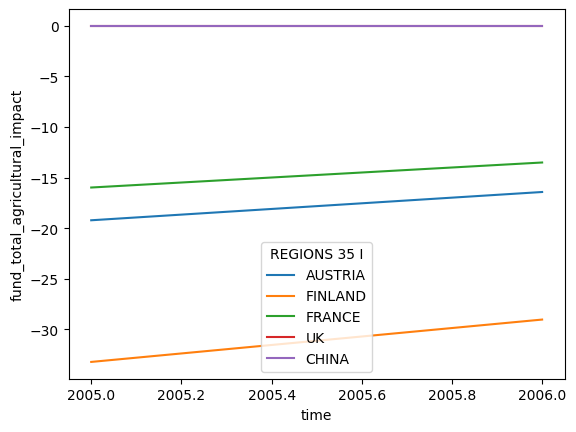

In [21]:
data_reduced = data[data['REGIONS 35 I'].isin(['AUSTRIA', 'FRANCE', 'FINLAND', 'UK', 'CHINA'])]
sns.lineplot(data, x='time', y='fund_total_agricultural_impact', hue='REGIONS 35 I')

In [23]:
data

,time,REGIONS 35 I,fund_a2_delayed_agricultural_impact_of_the_rate_of_climate_change,fund_a2_agricultural_impact_of_the_rate_of_climate_change,fund_a2_alpha_parameter,fund_a2_beta_parameter,fund_a2_rate_of_temperature_change,fund_a2_rho_parameter,fund_a2_temperature_change_delayed,fund_a3_agricultural_impact_of_the_level_of_climate_change,fund_a3_delta_l_parameter,fund_a4_delta_q_parameter,fund_a4_gamma_parameter,fund_total_agricultural_impact,fund_agricultural_imact_of_the_fertilisation
0,2005.0,AUSTRIA,0.0,-26.416754,-0.039,2.0,1.041040,10.0,0.000000,0.007730,0.022,-0.014,15.41,-19.220385,7.18864
1,2005.0,BELGIUM,0.0,-18.788371,-0.039,2.0,0.877955,10.0,0.000000,0.008524,0.022,-0.014,15.41,-11.591208,7.18864
2,2005.0,BULGARIA,0.0,0.000000,0.000,2.0,1.133990,10.0,0.000000,0.000000,0.000,0.000,0.00,0.000000,0.00000
3,2005.0,CROATIA,0.0,0.000000,0.000,2.0,1.103570,10.0,0.000000,0.000000,0.000,0.000,0.00,0.000000,0.00000
4,2005.0,CYPRUS,0.0,-17.404359,-0.039,2.0,0.845000,10.0,0.000000,0.008594,0.022,-0.014,15.41,-10.207126,7.18864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2006.0,INDIA,0.0,0.000000,0.000,2.0,0.022275,10.0,0.981890,0.000000,0.000,0.000,0.00,0.000000,0.00000
66,2006.0,LATAM,0.0,0.000000,0.000,2.0,0.022371,10.0,0.986115,0.000000,0.000,0.000,0.00,0.000000,0.00000
67,2006.0,RUSSIA,0.0,0.000000,0.000,2.0,0.035388,10.0,1.559870,0.000000,0.000,0.000,0.00,0.000000,0.00000
68,2006.0,USMCA,0.0,0.000000,0.000,2.0,0.031918,10.0,1.406925,0.000000,0.000,0.000,0.00,0.000000,0.00000
